In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
Y = df['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:
X = df.drop(['Outcome'], axis='columns')
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 7)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
289,5,108,72,43,75,36.1,0.263,33
328,2,102,86,36,120,45.5,0.127,23
394,4,158,78,0,0,32.9,0.803,31
321,3,112,74,30,0,31.6,0.197,25
326,1,122,64,32,156,35.1,0.692,30
...,...,...,...,...,...,...,...,...
579,2,197,70,99,0,34.7,0.575,62
502,6,0,68,41,0,39.0,0.727,41
537,0,57,60,0,0,21.7,0.735,67
196,1,105,58,0,0,24.3,0.187,21


In [21]:
Y_train

289    0
328    1
394    1
321    1
326    1
      ..
579    1
502    1
537    0
196    0
175    1
Name: Outcome, Length: 614, dtype: int64

In [22]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
236,7,181,84,21,192,35.9,0.586,51
323,13,152,90,33,29,26.8,0.731,43
98,6,93,50,30,64,28.7,0.356,23
701,6,125,78,31,0,27.6,0.565,49
...,...,...,...,...,...,...,...,...
153,1,153,82,42,485,40.6,0.687,23
392,1,131,64,14,415,23.7,0.389,21
308,0,128,68,19,180,30.5,1.391,25
70,2,100,66,20,90,32.9,0.867,28


In [23]:
Y_test

353    0
236    1
323    1
98     0
701    1
      ..
153    0
392    0
308    1
70     1
513    0
Name: Outcome, Length: 154, dtype: int64

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_predicted = lr.predict(X_test)

for i in range(len(Y_predicted)):
    if Y_predicted[i]<0.5:
        Y_predicted[i]=0
    else:
        Y_predicted[i] = 1
        
print("The first 5 predicted values are: ", Y_predicted[0:5])
print("The first 5 test values are: ", np.array(Y_test[0:5]))

The first 5 predicted values are:  [0. 1. 1. 0. 0.]
The first 5 test values are:  [0 1 1 0 1]


/var/folders/dw/qftf88jj3_x3kgyghg31j7v80000gn/T/ipykernel_7367/3788044353.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("The first 5 test values are: ", np.array(Y_test[0:5]))


In [25]:
lr.coef_

array([ 0.02125018,  0.00550138, -0.00233104,  0.00043653, -0.00019935,
        0.01410673,  0.18992038,  0.00192842])

In [26]:
lr.intercept_

-0.8369410878179937

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predicted = knn.predict(X_test)
print("The first 5 predicted values are: ", Y_predicted[0:5])
print("The first 5 test values are: ", np.array(Y_test[0:5]))
knn.score(X_test, Y_test)

The first 5 predicted values are:  [0 1 0 0 0]
The first 5 test values are:  [0 1 1 0 1]


/var/folders/dw/qftf88jj3_x3kgyghg31j7v80000gn/T/ipykernel_7367/3527637398.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("The first 5 test values are: ", np.array(Y_test[0:5]))


0.6883116883116883

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predicted = knn.predict(X_test)
print("The first 5 predicted values are: ", Y_predicted[0:5])
print("The first 5 test values are: ", np.array(Y_test[0:5]))
knn.score(X_test, Y_test)

The first 5 predicted values are:  [0 1 0 0 0]
The first 5 test values are:  [0 1 1 0 1]


/var/folders/dw/qftf88jj3_x3kgyghg31j7v80000gn/T/ipykernel_7367/3037947697.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("The first 5 test values are: ", np.array(Y_test[0:5]))


0.7077922077922078

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predicted = knn.predict(X_test)
print("The first 5 predicted values are: ", Y_predicted[0:5])
print("The first 5 test values are: ", np.array(Y_test[0:5]))
knn.score(X_test, Y_test)

The first 5 predicted values are:  [0 1 1 0 1]
The first 5 test values are:  [0 1 1 0 1]


/var/folders/dw/qftf88jj3_x3kgyghg31j7v80000gn/T/ipykernel_7367/2013432633.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("The first 5 test values are: ", np.array(Y_test[0:5]))


0.7077922077922078

Text(50.722222222222214, 0.5, 'test values')

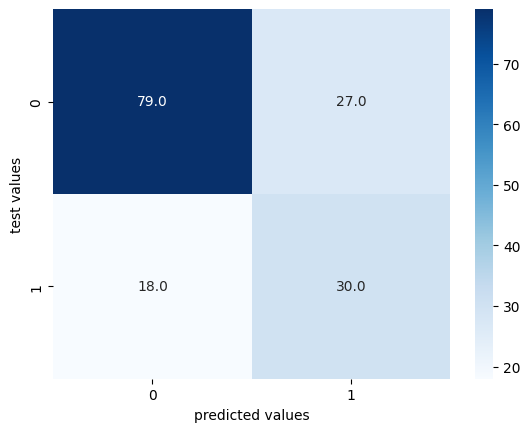

In [30]:
from sklearn import metrics
matrix = metrics.confusion_matrix(Y_predicted, Y_test)
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="0.1f")
plt.xlabel("predicted values")
plt.ylabel("test values")